# Data Source

Productivity Prediction of Garment Employees.

From: [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees)

# Problem Definition

This project aim to predict the worker's productivity based on the independent variables.

# Data Collection

## Importing Libraries

In [470]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [471]:
# load the dataset as pandas DataFrame
df = pd.read_csv('/home/er_bim/productivity-prediction/notebooks/data/worker_productivity.csv')

# show the random data
df.sample(8)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
512,1/29/2015,Quarter5,sweing,Thursday,12,0.75,15.26,1436.0,4200,45,0.0,0,0,35.0,0.750647
1185,3/11/2015,Quarter2,sweing,Wednesday,2,0.75,16.10,971.0,5400,45,0.0,0,1,45.0,0.750141
930,2/25/2015,Quarter4,sweing,Wednesday,6,0.75,18.79,1003.0,3960,45,0.0,0,1,33.0,0.750651
583,2/3/2015,Quarter1,finishing,Tuesday,1,0.80,3.94,NaN,1200,0,0.0,0,0,10.0,0.994850
770,2/15/2015,Quarter3,sweing,Sunday,12,0.80,15.26,1120.0,1440,50,0.0,0,0,34.0,0.800806
1083,3/5/2015,Quarter1,sweing,Thursday,2,0.60,15.28,529.0,1320,0,0.0,0,1,46.0,0.600099
124,1/7/2015,Quarter1,sweing,Wednesday,11,0.80,31.83,568.0,9900,40,0.0,0,0,55.0,0.412120
531,1/31/2015,Quarter5,finishing,Saturday,6,0.60,3.94,NaN,1200,0,0.0,0,0,10.0,0.971867


In [472]:
# load the dataset directly from source
df_fetched = fetch_ucirepo(id=597) 

# show the metadata
df_fetched.metadata

{'uci_id': 597,
 'name': 'Productivity Prediction of Garment Employees',
 'repository_url': 'https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees',
 'data_url': 'https://archive.ics.uci.edu/static/public/597/data.csv',
 'abstract': 'This dataset includes important attributes of the garment manufacturing process and the productivity of the employees which had been collected manually and also been validated by the industry experts.',
 'area': 'Business',
 'tasks': ['Classification', 'Regression'],
 'characteristics': ['Multivariate', 'Time-Series'],
 'num_instances': 1197,
 'num_features': 14,
 'feature_types': ['Integer', 'Real'],
 'demographics': [],
 'target_col': ['actual_productivity'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 2020,
 'last_updated': 'Mon Feb 26 2024',
 'dataset_doi': '10.24432/C51S6D',
 'creators': [],
 'intro_paper': {'title': 'Mining the productivity data of the 

# Data Definition

This dataset include the variables take place in the garments industry.

The variables definition are:
- date			:	Date in MM-DD-YYYY
- day			:	Day of the Week
- quarter			:	A portion of the month. A month was divided into four quarters
- department		:	Associated department with the instance
- team_no			:	Associated team number with the instance
- no_of_workers		:	Number of workers in each team
- no_of_style_change	:	Number of changes in the style of a particular product
- targeted_productivity	:	Targeted productivity set by the Authority for each team for each day.
- smv			:	Standard Minute Value, it is the allocated time for a task
- wip			:	Work in progress. Includes the number of unfinished items for products
- over_time		:	Represents the amount of overtime by each team in minutes
- incentive		:	Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
- idle_time		:	The amount of time when the production was interrupted due to several reasons
- idle_men		:	The number of workers who were idle due to production interruption
- actual_productivity	:	The actual % of productivity that was delivered by the workers. It ranges from 0-1.

**The target feature is "actual_productivity".**

# Data Evaluation

## General Information

In [473]:
print(f"The dataset contains of {df.shape[0]} columns and {df.shape[1]} rows")

The dataset contains of 1197 columns and 15 rows


In [474]:
print(f"The dataset contains {df.duplicated().sum()} duplicate value")

The dataset contains 0 duplicate value


In [475]:
# check the basic dataset information
df_fetched.variables

,name,role,type,demographic,description,units,missing_values
0,date,Feature,Date,None,None,None,no
1,quarter,Feature,Categorical,None,None,None,no
2,department,Feature,Categorical,None,None,None,no
3,day,Feature,Categorical,None,None,None,no
4,team,Feature,Integer,None,None,None,no
5,targeted_productivity,Feature,Continuous,None,None,None,no
6,smv,Feature,Continuous,None,None,None,no
7,wip,Feature,Integer,None,None,None,yes
8,over_time,Feature,Integer,None,None,None,no
9,incentive,Feature,Integer,None,None,BDT,no


In [476]:
# basic descriptive statistics of numeric features
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [477]:
# basic descriptive statistics of non-numeric features
df.describe(exclude=[np.number])

,date,quarter,department,day
count,1197,1197,1197,1197
unique,59,5,3,6
top,1/31/2015,Quarter1,sweing,Wednesday
freq,24,360,691,208


Notes:
- Missing values occur in the feature "wip".
- The targeted productivity range is set between 0.7 to 0.8.
- The maximum value of actual productivity is more than 1, which exceeds the range stated in the data definition.

## Checking Unique Values

In [478]:
# show the number of unique values for each column in the dataset
df.nunique()

date                      59
quarter                    5
department                 3
day                        6
team                      12
targeted_productivity      9
smv                       70
wip                      548
over_time                143
incentive                 48
idle_time                 12
idle_men                  10
no_of_style_change         3
no_of_workers             61
actual_productivity      879
dtype: int64

In [479]:
# create a list of categorical columns
cat_cols = [col for col in df.columns if df[col].dtype == 'O']

# show the unique values for each categorical col
for col in cat_cols:
    val = df[col].unique()
    print(f"The unique values in column {col} are:\n {val}\n____________________________")

The unique values in column date are:
 ['1/1/2015' '1/3/2015' '1/4/2015' '1/5/2015' '1/6/2015' '1/7/2015'
 '1/8/2015' '1/10/2015' '1/11/2015' '1/12/2015' '1/13/2015' '1/14/2015'
 '1/15/2015' '1/17/2015' '1/18/2015' '1/19/2015' '1/20/2015' '1/21/2015'
 '1/22/2015' '1/24/2015' '1/25/2015' '1/26/2015' '1/27/2015' '1/28/2015'
 '1/29/2015' '1/31/2015' '2/1/2015' '2/2/2015' '2/3/2015' '2/4/2015'
 '2/5/2015' '2/7/2015' '2/8/2015' '2/9/2015' '2/10/2015' '2/11/2015'
 '2/12/2015' '2/14/2015' '2/15/2015' '2/16/2015' '2/17/2015' '2/18/2015'
 '2/19/2015' '2/22/2015' '2/23/2015' '2/24/2015' '2/25/2015' '2/26/2015'
 '2/28/2015' '3/1/2015' '3/2/2015' '3/3/2015' '3/4/2015' '3/5/2015'
 '3/7/2015' '3/8/2015' '3/9/2015' '3/10/2015' '3/11/2015']
____________________________
The unique values in column quarter are:
 ['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']
____________________________
The unique values in column department are:
 ['sweing' 'finishing ' 'finishing']
___________________________

Notes:
- The column date data type is recognized as string, not a datetime one.
- The column quarter are meant to be the week of the month.
- The 'sweing' value in the column department will be converted to 'sewing', while the other values are most likely the same, and only one of them will be used, the 'finishing' one.

# Data Distribution Checking and Outliers Detection

## Categorical Columns

Check the data distribution of categorical columns using histrogram plot.

In [480]:
def check_distribution(col):
    """A function to visualize the data distribution for each categorical column.
    """
    # Histogram
    sns.histplot(df[col], bins=30, kde=False)
    plt.title(f"Distribution of {str(col).upper()}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    if col == 'date':
        # Display the range of dates
        min_date = df['date'].min()
        max_date = df['date'].max()
        
        duration = max_date - min_date
        
        print(f"The range of dates in the dataset is from {min_date} to {max_date}.")
        print(f"The duration of the data is {duration.days} days.")
        
    # Show the plot
    plt.show()

In [481]:
# recheck the categorical columns
cat_cols

['date', 'quarter', 'department', 'day']

In [482]:
# convert the 'date' column into datetime data type
df['date'] = pd.to_datetime(df['date'])

The range of dates in the dataset is from 2015-01-01 00:00:00 to 2015-03-11 00:00:00.
The duration of the data is 69 days.


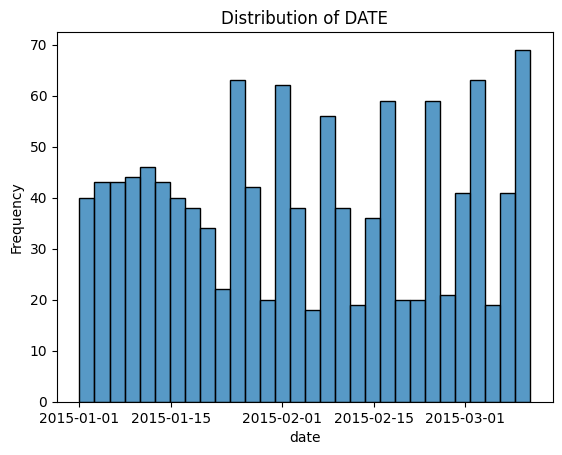

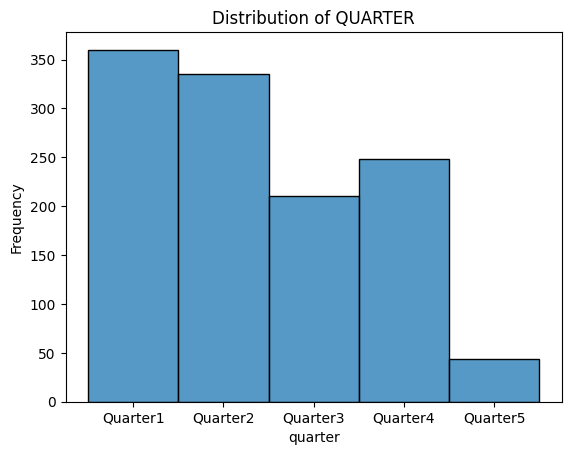

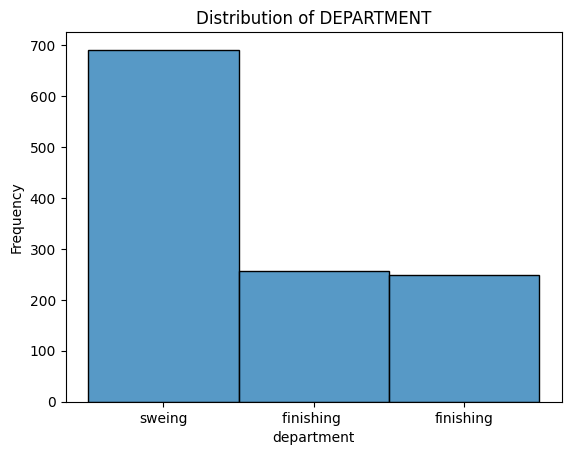

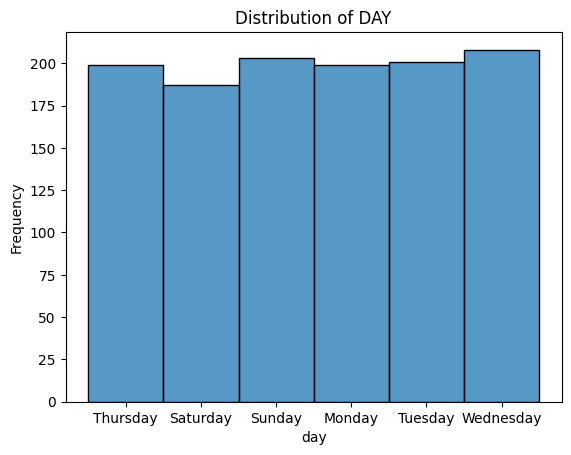

In [483]:
# plot the graphs for each categorical column
for c in cat_cols:
    check_distribution(c)

Notes:
- Work load in the factory was slower in the second half, after week 2, of the month.
- Working days in the factory are distributed evenly throughout the week, 6 working days a week with a day off on Friday

## Numerical Columns

To ensure data integrity, we will determine the outliers in each numerical column.

Each column will be plotted as a histogram to recognize the distribution and the skewness shape, compared to the boxplot to check the data range and the outliers value.

In [484]:
# create a list of numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [485]:
def check_outlier(col):
    """A function to visualize the data distribution for each numerical column.
    The histogram informs the data distribution, and the boxplot gives the detailed data on the outliers.
    """
    # Create a figure with two subplots
    fig, (ax_hist, ax_box) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [2, 1]})

    # Histogram with KDE
    sns.histplot(df[col], bins=30, kde=True, ax=ax_hist)
    ax_hist.set_title(f"Distribution of {str(col).upper()}")
    ax_hist.set_xlabel(col)
    ax_hist.set_ylabel('Frequency')

    # Box plot
    sns.boxplot(x=df[col], ax=ax_box)
    ax_box.set_xlabel(col)
    ax_box.set_title(f"Boxplot of {str(col).upper()}")

    # Show the plot
    plt.tight_layout()
    plt.show()

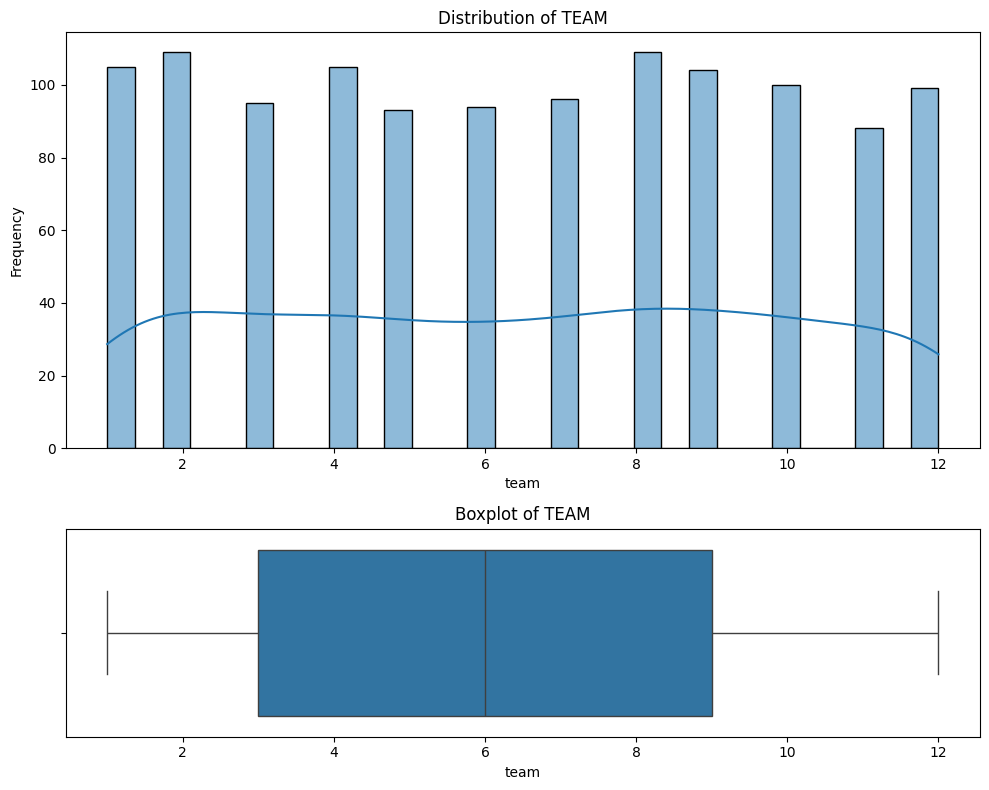

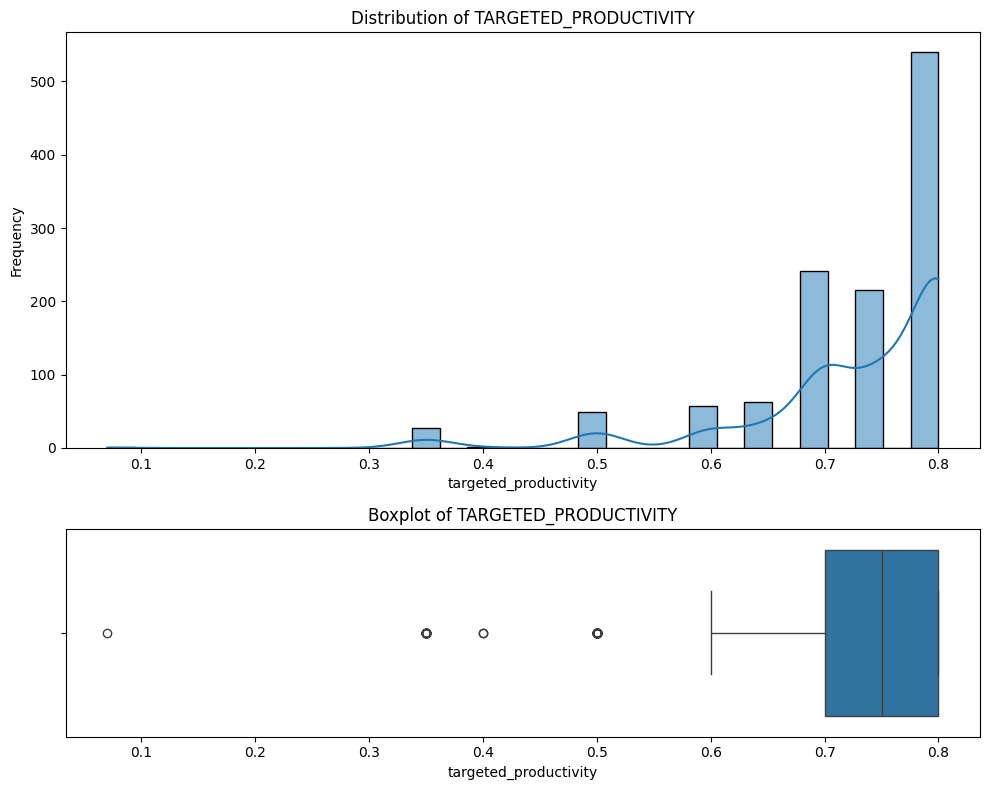

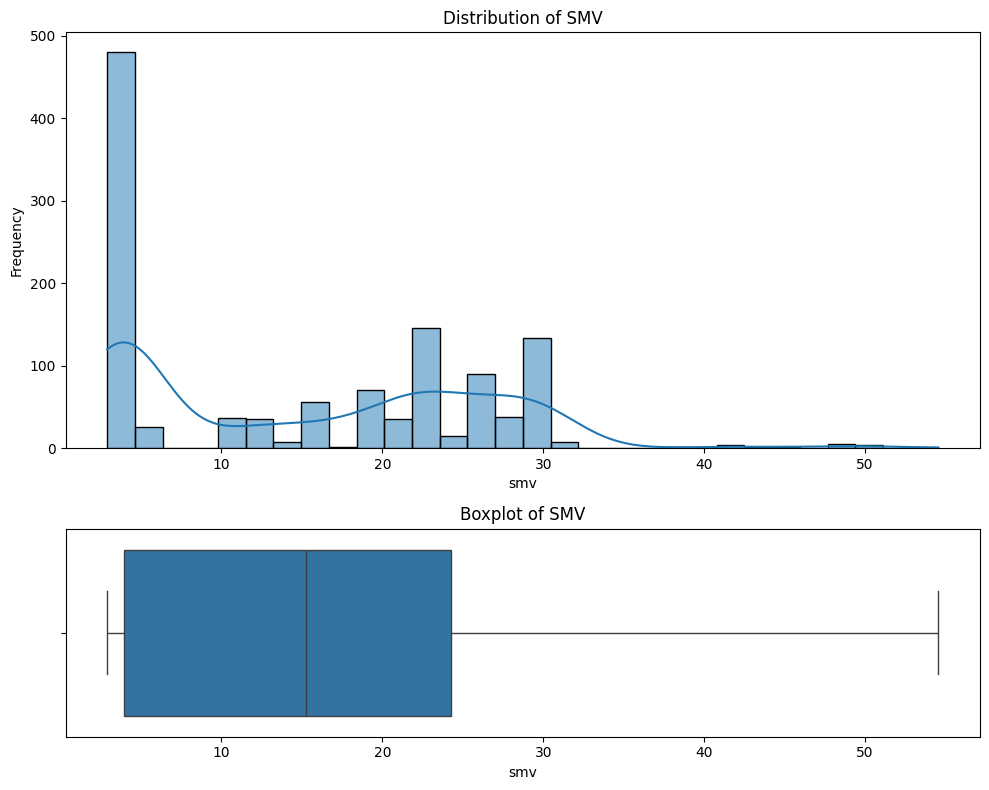

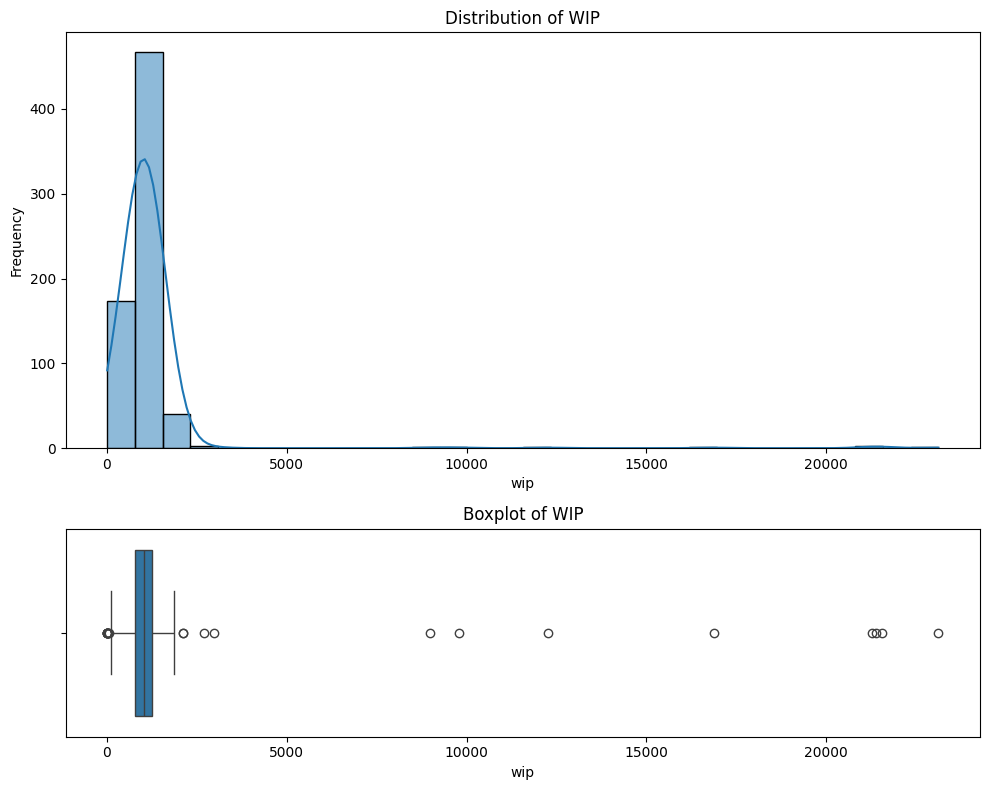

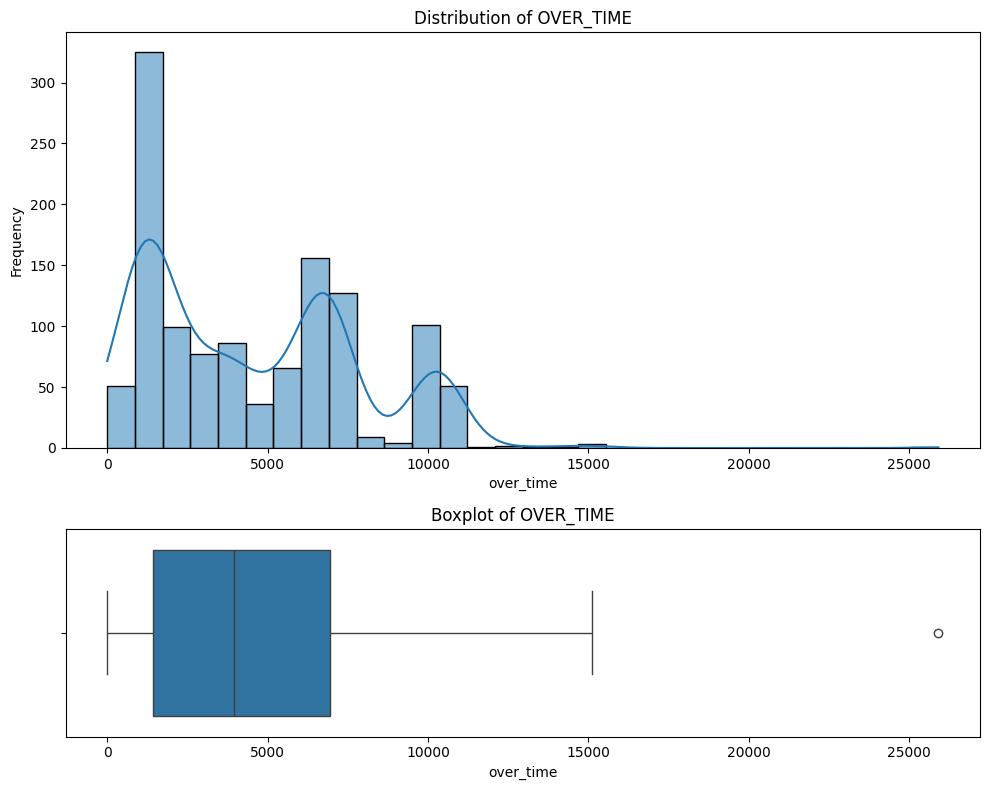

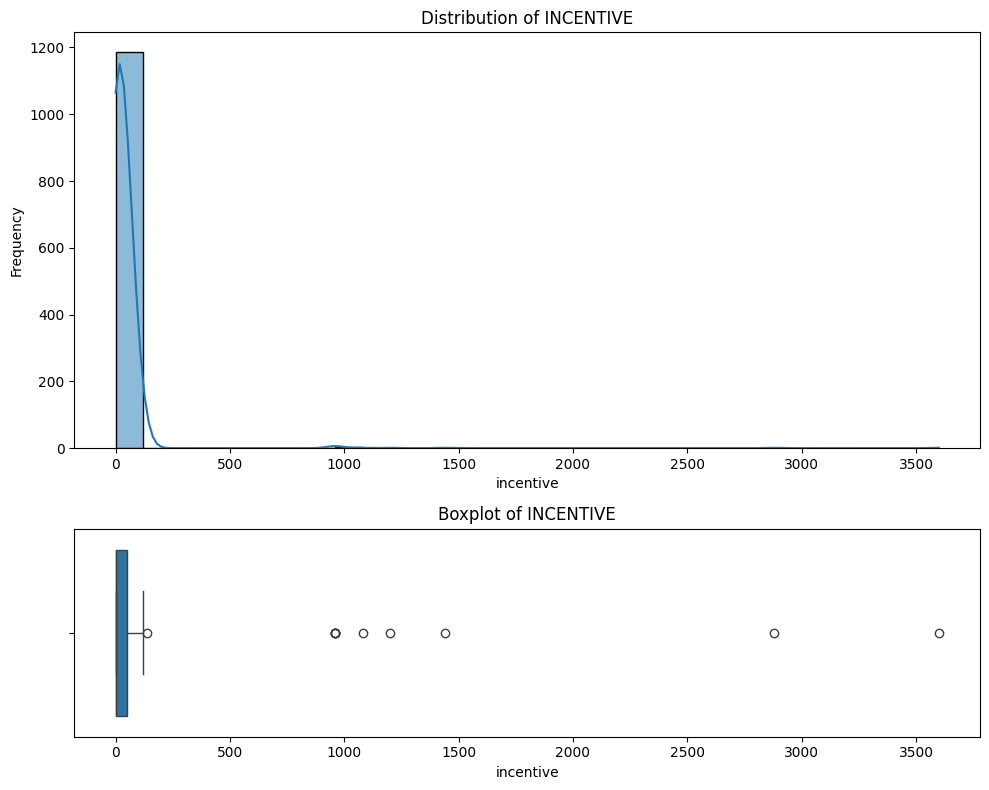

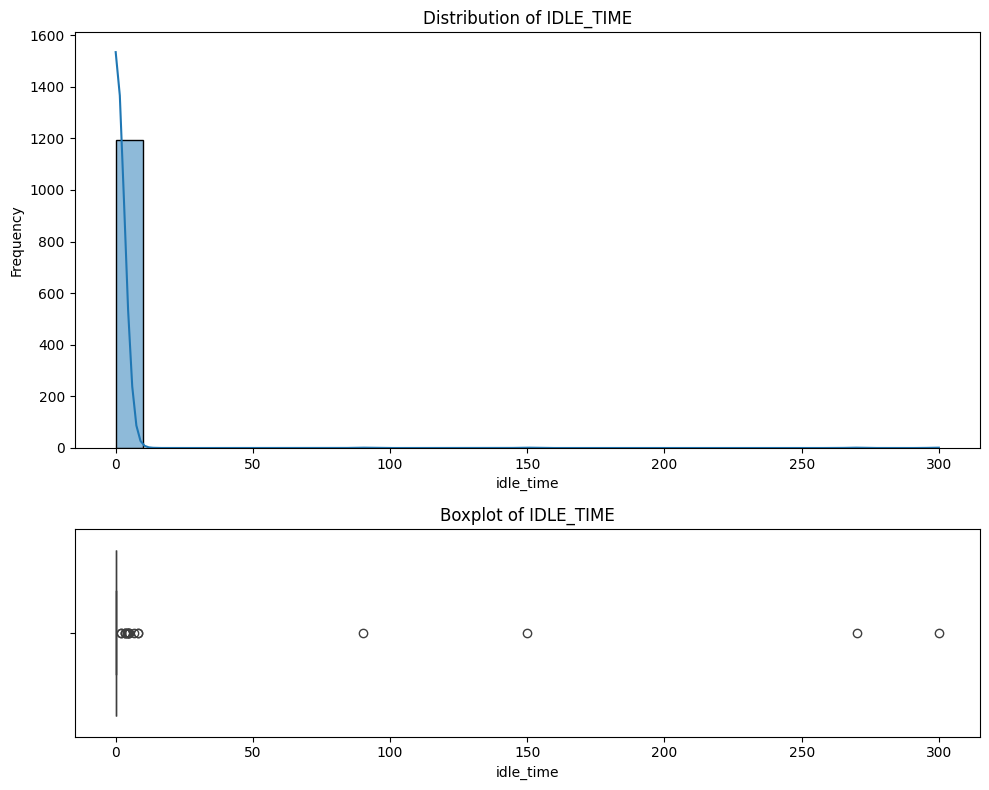

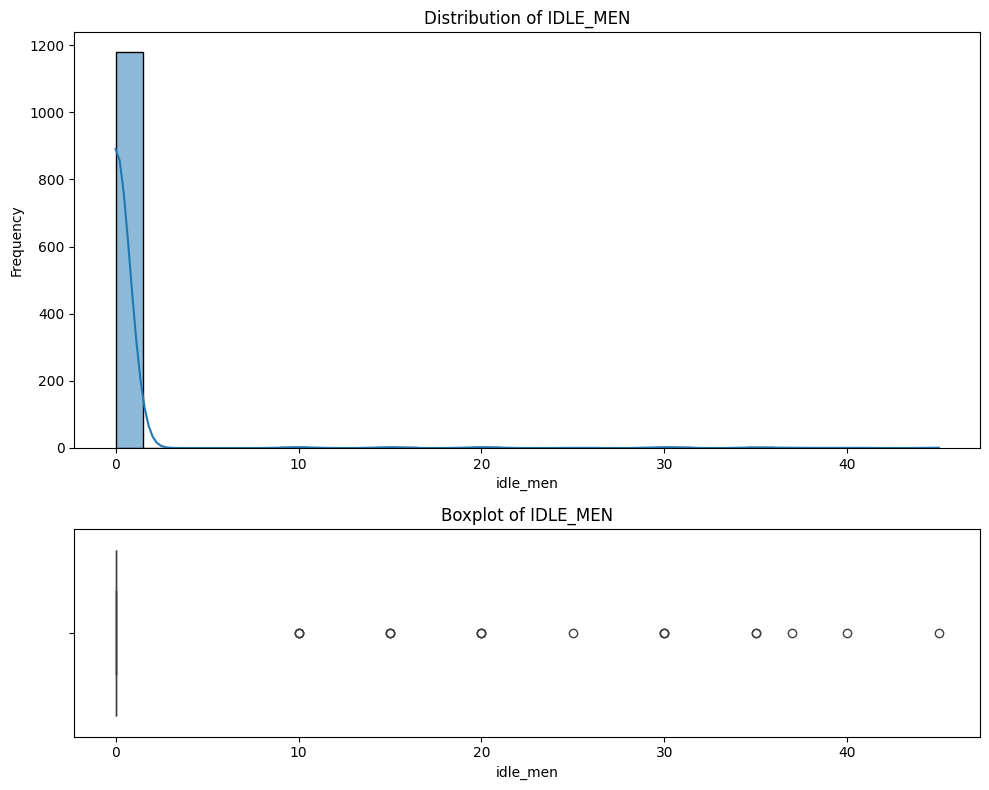

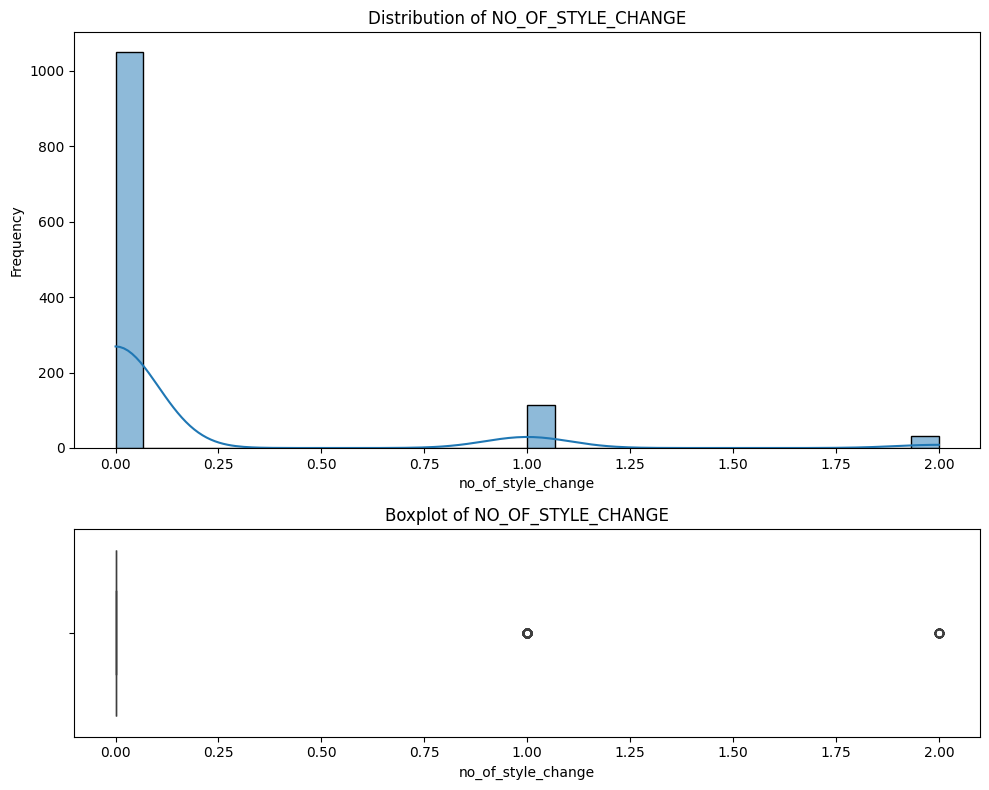

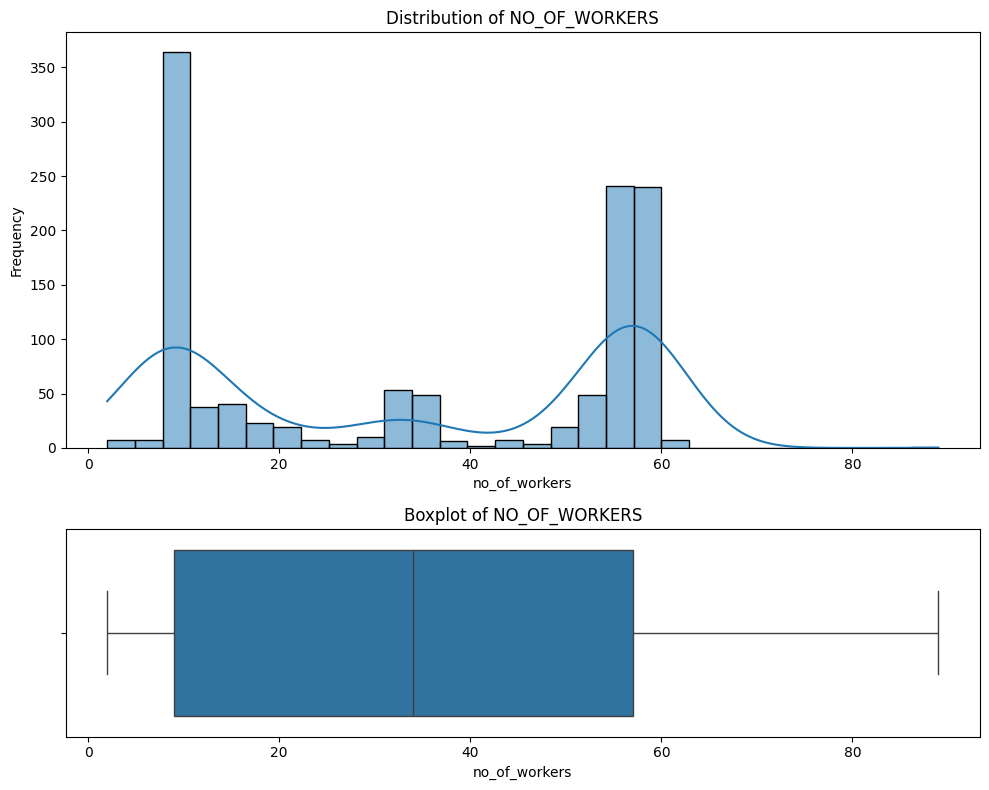

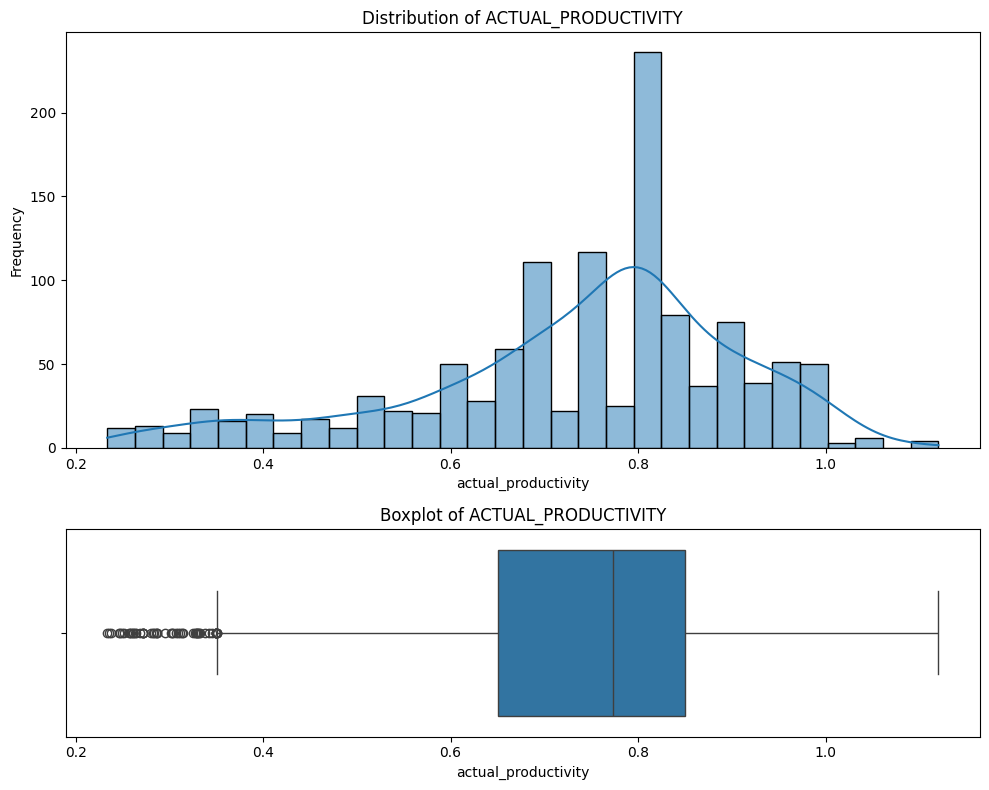

In [486]:
# plot the graphs for each numerical column
for c in num_cols:
    check_outlier(c)

From the graphs above, we can see that the columns indicated contain the outliers as follows:
- `targeted_productivity`, the value less than 0.5 will be evaluated further.
- `wip`, this column will be evaluated with more detail to determine the missing values handling.
- `over_time`, the significance of the outliers will be evaluated later.
- `incentive`, the significance and correlation with other column of the outliers will be evaluated later.
- `idle_time`, the significance of the outliers will be evaluated later.
- `idle_men`, the significance of the outliers will be evaluated later.
- `no_of_style_change`, the significance of the outliers will be evaluated later.
- `actual_productivity`, there are some data points that exceed the value 1, as stated previously in the data definition; the actual_productivity value range is between 0 and 1. 

### Outliers Analysis and Removal

To follow up the notes above about the outliers, we will evaluate them and remove them if necessary.

,column,lower_whisker,lower_quartile,median,upper_quartile,upper_whisker
0,team,1.000000,3.000000,6.000000,9.000000,12.000000
1,targeted_productivity,0.600000,0.700000,0.750000,0.800000,0.800000
2,smv,2.900000,3.940000,15.260000,24.260000,54.560000
3,wip,NaN,NaN,NaN,NaN,NaN
4,over_time,0.000000,1440.000000,3960.000000,6960.000000,15120.000000
5,incentive,0.000000,0.000000,0.000000,50.000000,119.000000
6,idle_time,0.000000,0.000000,0.000000,0.000000,0.000000
7,idle_men,0.000000,0.000000,0.000000,0.000000,0.000000
8,no_of_style_change,0.000000,0.000000,0.000000,0.000000,0.000000
9,no_of_workers,2.000000,9.000000,34.000000,57.000000,89.000000


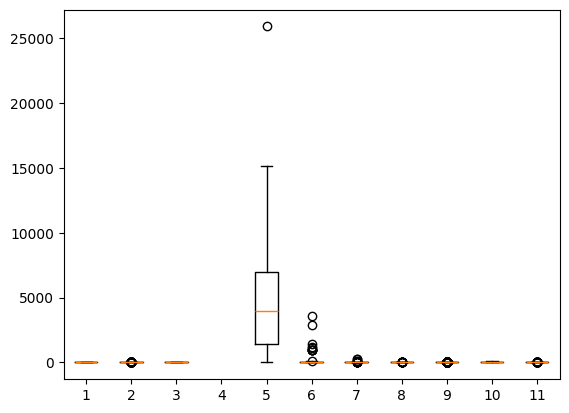

In [487]:
def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['column'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

labels = num_cols
bp = plt.boxplot([df['team'],
 df['targeted_productivity'],
 df['smv'],
 df['wip'],
 df['over_time'],
 df['incentive'],
 df['idle_time'],
 df['idle_men'],
 df['no_of_style_change'],
 df['no_of_workers'],
 df['actual_productivity']])

get_box_plot_data(labels, bp)


   label  lower_whisker  lower_quartile    median  upper_quartile  \
0  data1      -2.534882       -0.666280  0.015350        0.676774   
1  data2       2.556100        4.355419  5.005370        5.641053   
2  data3       7.468471        9.335277  9.967791       10.607946   

   upper_whisker  
0       2.586705  
1       7.540393  
2      12.445268  


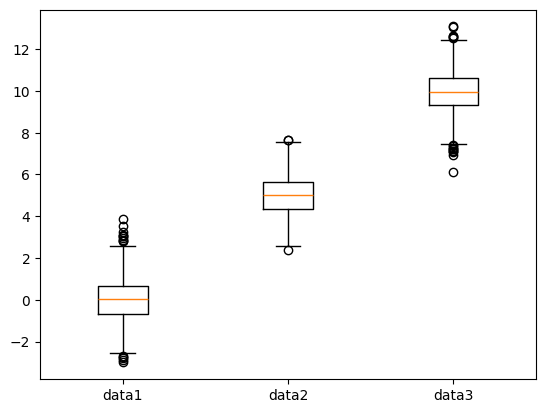

In [488]:
def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

data1 = np.random.normal(loc = 0, scale = 1, size = 1000)
data2 = np.random.normal(loc = 5, scale = 1, size = 1000)
data3 = np.random.normal(loc = 10, scale = 1, size = 1000)

labels = ['data1', 'data2', 'data3']
bp = plt.boxplot([data1, data2, data3], labels=labels)
print(get_box_plot_data(labels, bp))
plt.show()

#### `targeted_produtivity`

In [489]:
low_target = df[df['targeted_productivity'] < 0.5]
print(f"There are {len(low_target)} data in the targeted_productivity column valued below 0.5")
low_target.sort_values(by='targeted_productivity')

There are 30 data in the targeted_productivity column valued below 0.5


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
633,2015-02-05,Quarter1,sweing,Thursday,7,0.07,24.26,1608.0,6960,0,0.0,0,0,58.0,0.522845
146,2015-01-08,Quarter2,sweing,Thursday,11,0.35,12.52,287.0,25920,38,0.0,0,0,54.0,0.349951
214,2015-01-12,Quarter2,sweing,Monday,4,0.35,22.40,581.0,7350,0,0.0,0,0,51.5,0.350633
194,2015-01-12,Quarter2,finishing,Monday,4,0.35,4.30,NaN,3240,0,0.0,0,0,18.0,0.942214
237,2015-01-13,Quarter2,sweing,Tuesday,10,0.35,22.40,715.0,10170,23,0.0,0,0,56.5,0.350206
239,2015-01-14,Quarter2,finishing,Wednesday,4,0.35,4.30,NaN,2700,0,0.0,0,0,8.0,0.908081
255,2015-01-14,Quarter2,sweing,Wednesday,11,0.35,14.61,838.0,7200,23,0.0,0,0,55.0,0.350031
216,2015-01-13,Quarter2,finishing,Tuesday,4,0.35,4.30,NaN,2160,0,0.0,0,0,12.0,0.952020
259,2015-01-15,Quarter3,finishing,Thursday,4,0.35,4.30,NaN,3600,0,0.0,0,0,20.0,0.988636
336,2015-01-19,Quarter3,sweing,Monday,12,0.35,15.26,1111.0,6120,23,0.0,0,0,34.0,0.350218


Decision:
- The outlier that will be dropped in the `targeted_productivity` column is the data valued less than 0.5; the threshold I am considered to be very pessimistic if the target is below 0.5.

In [490]:
# create the instance of drop data
drop_target = df[df['targeted_productivity'] < 0.5]

# execute the outlier removal
df.drop(drop_target.index, inplace=True)


#### `wip`

In [491]:
high_wip = df[df['wip'] > 2000]
print(f"There are {len(high_wip)} data in the wip column valued above 2000")
high_wip.sort_values(by='wip')

There are 12 data in the wip column valued above 2000


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
801,2015-02-16,Quarter3,sweing,Monday,9,0.60,18.79,2103.0,5400,0,0.0,0,1,54.0,0.329965
817,2015-02-17,Quarter3,sweing,Tuesday,9,0.65,18.79,2120.0,5520,0,0.0,0,1,51.0,0.650134
577,2015-02-02,Quarter1,sweing,Monday,7,0.70,24.26,2698.0,6720,0,0.0,0,0,56.0,0.295308
573,2015-02-02,Quarter1,sweing,Monday,6,0.70,18.79,2984.0,3960,30,0.0,0,0,33.0,0.700355
570,2015-02-02,Quarter1,sweing,Monday,9,0.75,29.12,8992.0,6960,55,0.0,0,0,58.0,0.799963
572,2015-02-02,Quarter1,sweing,Monday,11,0.70,20.55,9792.0,6480,60,0.0,0,0,54.0,0.700398
568,2015-02-02,Quarter1,sweing,Monday,12,0.80,15.26,12261.0,3600,63,0.0,0,0,35.0,0.800402
561,2015-02-02,Quarter1,sweing,Monday,1,0.80,22.94,16882.0,7020,113,0.0,0,0,58.5,1.000602
564,2015-02-02,Quarter1,sweing,Monday,3,0.80,22.52,21266.0,6840,70,0.0,0,0,57.0,0.900142
563,2015-02-02,Quarter1,sweing,Monday,2,0.80,22.52,21385.0,7020,88,0.0,0,0,58.5,0.900158


Decision:
- The outliers that will be dropped in the `wip` column are the data valued more than 5000.

In [492]:
# execute the outlier removal
df.drop(high_wip.index, inplace=True)

#### `over_time`

In [493]:
high_ot = df[df['over_time'] > 15000]
print(f"There are {len(high_ot)} data in the over_time column valued more than 15000")
high_ot.sort_values(by='over_time')

There are 1 data in the over_time column valued more than 15000


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
138,2015-01-08,Quarter2,sweing,Thursday,12,0.8,11.61,548.0,15120,63,0.0,0,0,31.5,0.800107


Decision:
- The outliers that will be dropped in the `over_time` column are the data valued more than 15000.

In [494]:
# execute the outlier removal
df.drop(high_ot.index, inplace=True)

#### `incentive`

In [495]:
# Calculate the count of each unique value in the 'incentive' column
incentive_counts = df['incentive'].value_counts().reset_index()

# Calculate the percentage distribution
total_counts = df['incentive'].value_counts().sum()
incentive_counts['Percentage'] = (incentive_counts['count'] / total_counts) * 100

# Rename the columns
incentive_counts.columns = ['Incentive', 'Count', 'Percentage']

# Display the table
incentive_counts.sort_values(by='Incentive')

,Incentive,Count,Percentage
0,0,582,50.433276
35,21,1,0.086655
5,23,30,2.599653
30,24,2,0.173310
47,25,1,0.086655
14,26,9,0.779896
27,27,2,0.173310
32,29,1,0.086655
4,30,50,4.332756
41,32,1,0.086655


There is a sigfincant value gap from 138 to 960 in this column, let's check them.

In [496]:
high_incentive = df[df['incentive'] > 138]
print(f"There are {len(high_incentive)} data in the incentive column valued more than 138")
high_incentive.sort_values(by='incentive')

There are 10 data in the incentive column valued more than 138


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1128,2015-03-09,Quarter2,finishing,Monday,11,0.80,2.90,NaN,0,960,0.0,0,0,8.0,0.960625
1138,2015-03-09,Quarter2,finishing,Monday,4,0.75,3.94,NaN,0,960,0.0,0,0,8.0,0.795388
1139,2015-03-09,Quarter2,finishing,Monday,1,0.75,3.94,NaN,0,960,0.0,0,0,8.0,0.794567
1148,2015-03-09,Quarter2,finishing,Monday,10,0.70,2.90,NaN,0,960,0.0,0,0,8.0,0.477292
1149,2015-03-09,Quarter2,finishing,Monday,8,0.65,3.90,NaN,0,960,0.0,0,0,8.0,0.264062
1129,2015-03-09,Quarter2,finishing,Monday,12,0.80,4.60,NaN,0,1080,0.0,0,0,9.0,0.902963
1143,2015-03-09,Quarter2,finishing,Monday,2,0.70,3.90,NaN,0,1200,0.0,0,0,10.0,0.682500
1137,2015-03-09,Quarter2,finishing,Monday,3,0.80,4.60,NaN,0,1440,0.0,0,0,12.0,0.795417
1130,2015-03-09,Quarter2,finishing,Monday,5,0.60,3.94,NaN,0,2880,0.0,0,0,12.0,0.864343
1133,2015-03-09,Quarter2,finishing,Monday,9,0.75,2.90,NaN,0,3600,0.0,0,0,15.0,0.841000


Decision:
- The outliers that will be dropped in the `incentive` column are the data valued more than 138.

In [497]:
# execute the outlier removal
df.drop(high_incentive.index, inplace=True)

#### `idle_time`

In [498]:
non_zeros_idle_time = df[df['idle_time'] > 0]
print(f"There are {len(non_zeros_idle_time)} non-zeros data in the idle_time column.")

# calculate the non-zeros percentage
non_zeros_percentage = round((len(non_zeros_idle_time)/len(df))*100, 2)

print(f"The non-zeros data in the column 'idle_time' is {non_zeros_percentage}% of the data length.\n")

non_zeros_idle_time.sort_values(by='idle_time')

There are 16 non-zeros data in the idle_time column.
The non-zeros data in the column 'idle_time' is 1.4% of the data length.



,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
775,2015-02-15,Quarter3,sweing,Sunday,8,0.70,30.10,507.0,5880,40,2.0,10,1,59.0,0.700573
798,2015-02-16,Quarter3,sweing,Monday,8,0.70,30.10,7.0,7080,27,2.0,10,2,59.0,0.621972
880,2015-02-22,Quarter4,sweing,Sunday,7,0.75,30.10,627.0,6960,0,3.5,20,1,58.0,0.393549
848,2015-02-19,Quarter3,sweing,Thursday,5,0.80,30.10,276.0,600,63,3.5,15,0,59.5,0.799983
1001,2015-03-01,Quarter1,sweing,Sunday,7,0.80,30.10,934.0,6960,0,3.5,15,0,58.0,0.579511
996,2015-03-01,Quarter1,sweing,Sunday,11,0.80,11.61,347.0,0,50,4.0,20,0,57.0,0.682433
1085,2015-03-05,Quarter1,sweing,Thursday,7,0.80,30.10,834.0,1200,0,4.0,40,0,59.0,0.366054
843,2015-02-18,Quarter3,sweing,Wednesday,8,0.65,29.40,962.0,4560,0,4.5,30,2,57.0,0.251399
882,2015-02-22,Quarter4,sweing,Sunday,5,0.80,30.10,450.0,5700,0,4.5,25,0,60.0,0.307501
818,2015-02-17,Quarter3,sweing,Tuesday,8,0.60,29.40,179.0,0,23,5.0,30,2,58.0,0.600983


Decision:
- The outliers in the column `idle_time` are probably associated with ones in the column `idle_time`; the decision will be made after we analyze the latter column later.

#### `idle_men`

In [499]:
non_zeros_idle_men = df[df['idle_men'] > 0]
print(f"There are {len(non_zeros_idle_men)} non-zeros data in the idle_men column valued more than zero")

# calculate the non-zeros percentage
non_zeros_percentage = round((len(non_zeros_idle_men)/len(df))*100, 2)

print(f"The non-zeros data in the column 'idle_men' is {non_zeros_percentage}% of the data length.")

There are 16 non-zeros data in the idle_men column valued more than zero
The non-zeros data in the column 'idle_men' is 1.4% of the data length.


The count number non-zeros data in the column `idle_men` is similar to non-zeros data in the column `idle_men`.

We have to check whether the row position is identical or not.

In [500]:
# Compare the non-zeros values row position in both columns
comparison = non_zeros_idle_time['idle_time'].index == non_zeros_idle_men['idle_men'].index
print(comparison)

# Check if all non-zeros 'idle_time' values match 'idle_men' values
all_match = comparison.all()
print(f"\nAll non-zeros 'idle_time' values match all non-zeros 'idle_men' values: {all_match}")

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]

All non-zeros 'idle_time' values match all non-zeros 'idle_men' values: True


The `idle_men` data is associated with the `no_of_workers` data, thus the 'effective workers' count is the result of the `no_of_workers` substracted by the `idle_men` data.


Decision:
- Change column `no_of_workers` so that it refers to the "effective number of workers" that is obtained by deducting column `idle_men` value from column `no_of_workers`.
- Delete both of the columns `idle_time` and `idle_men`, the non-zeros data in those columns only cover 1.5% from the entire data.

#### `no_of_style_change`

In [501]:
# Calculate the count of each unique value in the 'no_of_style_change' column
style_change_counts = df['no_of_style_change'].value_counts().reset_index()

# Calculate the percentage distribution
total_counts = df['no_of_style_change'].value_counts().sum()
style_change_counts['Percentage'] = (style_change_counts['count'] / total_counts) * 100

# Rename the columns
style_change_counts.columns = ['Style_change', 'Count', 'Percentage']

# Display the table
style_change_counts.sort_values(by='Style_change')

,Style_change,Count,Percentage
0,0,1007,88.024476
1,1,105,9.178322
2,2,32,2.797203


There are only three unique values in this column, and the value more than zero are just about 12% from total data points.

In [502]:
print(f"The correlation value of the column `no_of_style_change` to the others are:\n\n{df.corr(numeric_only=True)['no_of_style_change'].sort_values()}")

The correlation value of the column `no_of_style_change` to the others are:

targeted_productivity   -0.229896
actual_productivity     -0.189168
wip                     -0.127893
idle_time               -0.009476
team                    -0.005333
incentive                0.014515
over_time                0.057735
idle_men                 0.129165
smv                      0.311405
no_of_workers            0.325124
no_of_style_change       1.000000
Name: no_of_style_change, dtype: float64


And also have a weak to moderate correlation to some columns i.e. `targeted_productivity`, `actual_productivity`, `smv`, and `no_of_workers`.   

Decision:
- The column `no_of_style_change` will be kept as it is; no modification needs to be applied.

#### `no_of_workers`

In [503]:
df['no_of_workers'].unique()

array([59. ,  8. , 30.5, 56. , 57.5, 55. , 54. , 18. , 60. , 12. , 20. ,
       17. , 56.5, 54.5, 29.5, 31.5, 31. , 55.5, 58. , 10. , 16. , 32. ,
       58.5, 15. ,  5. , 57. , 53. ,  2. ,  9. ,  7. , 19. , 28. , 34. ,
       89. , 14. , 25. , 52. ,  4. , 21. , 35. , 51. , 33. , 11. , 33.5,
       22. , 26. , 27. , 59.5, 50. , 44. , 49. , 47. , 48. , 42. , 24. ,
       46. , 45. , 39. , 38. ,  6. ])

The value for the number of people should not be in decimal numbers; it should be integers.

Decision:
- Round the decimal numbers up in the column `no_of_workers` to the nearest integer.

#### `actual_productivity`

In [504]:
outlier_productivity = df[df['actual_productivity'] > 1]
print(f"There are {len(outlier_productivity)} data in the actual_productivity column valued more than one")
outlier_productivity.sort_values(by='actual_productivity')

There are 36 data in the actual_productivity column valued more than one


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
581,2015-02-03,Quarter1,sweing,Tuesday,1,0.80,22.52,1500.0,6900,113,0.0,0,0,57.5,1.000019
655,2015-02-08,Quarter2,sweing,Sunday,2,0.80,22.52,1233.0,6900,113,0.0,0,0,57.5,1.000019
637,2015-02-07,Quarter1,sweing,Saturday,2,0.80,22.52,1186.0,6900,113,0.0,0,0,58.0,1.000019
619,2015-02-05,Quarter1,sweing,Thursday,1,0.80,22.52,1485.0,6900,113,0.0,0,0,57.5,1.000019
714,2015-02-11,Quarter2,sweing,Wednesday,1,0.80,22.52,1498.0,0,113,0.0,0,0,57.0,1.000066
457,2015-01-27,Quarter4,sweing,Tuesday,3,0.75,22.52,1299.0,6840,119,0.0,0,0,57.0,1.000230
478,2015-01-28,Quarter4,sweing,Wednesday,3,0.80,22.52,1350.0,6840,113,0.0,0,0,57.0,1.000230
456,2015-01-27,Quarter4,sweing,Tuesday,2,0.75,22.52,1635.0,6840,119,0.0,0,0,57.0,1.000230
498,2015-01-29,Quarter5,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57.0,1.000230
600,2015-02-04,Quarter1,sweing,Wednesday,3,0.80,22.52,968.0,6840,113,0.0,0,0,57.0,1.000230


Decision:
- The outliers that will be dropped in the `actual_productivity` column are the data valued more than 1.

In [505]:
# execute the outlier removal
df.drop(outlier_productivity.index, inplace=True)

# Feature Engineering

In this section, we will modify columns and data for improving the dataset quality.

## Column `quarter` Modification

This column's value are meant to be the week of the month, so we will alter the "quarter" both in the column's name and value into "week".

In [506]:
# column name alteration
df.rename(columns = {'quarter':'week'}, inplace = True)

# data value alteration
value_rename = {'Quarter1':'Week1', 'Quarter2':'Week2', 'Quarter3':'Week3', 'Quarter4':'Week4', 'Quarter5':'Week5'}
df['week'].replace(value_rename, inplace=True)

## Reset the Index Order

The outliers are already dropped in the section before, now we just need to reset the index order.

In [507]:
df = df.reset_index(drop=True)

## Column `no_of_workers` Modification

The value in column `no_of_workers` substracted to the value in column `idle_men`.

In [508]:
# deducting column 'idle_men' value from column 'no_of_workers'
df['no_of_workers'] = df['no_of_workers'] - df['idle_men']

# rounding up the decimal numbers
df['no_of_workers'] = np.ceil(df['no_of_workers'])

# Convert the values to integers
df['no_of_workers'] = df['no_of_workers'].astype(int)

## Drop the Columns `idle_time` and `idle_men`

The non-zero values in these columns are just 1.5% of the entire data; dropping the whole column instead of the non-zero will make the dataset simpler.

In [509]:
# drop the columns 'idle_time' and 'idle_men'
df.drop(columns=['idle_time', 'idle_men'], inplace=True)

## Column `department` Modification

In [510]:
print(f"The unique values in the column 'department' are: {df['department'].unique()}.")

The unique values in the column 'department' are: ['sweing' 'finishing ' 'finishing'].


The value "sewing" will be altered to "sewing" and the value "finishing " (with a blank space character) will be altered to "finishing".

In [511]:
# data value alteration
department_rename = {'sweing':'sewing', 'finishing ':'finishing'}
df['department'].replace(department_rename, inplace=True)

Now let's recheck the unique values.

In [512]:
print(f"After the alteration, the unique values in the column 'department' are: {df['department'].unique()}.")

After the alteration, the unique values in the column 'department' are: ['sewing' 'finishing'].


## Imputation for Missing Values in Column `wip` 

There is only a column that contains missing value, the column `wip`.

Now we will impute it.

In [513]:
all = len(df)
missing_values = df['wip'].isnull().sum()
unique_count = df['wip'].nunique()

In [514]:
print(f"There are {missing_values} missing values in the column 'wip'\n")

print(f"There are {all - missing_values} data with specific value, with {unique_count} unique values.")


There are 473 missing values in the column 'wip'

There are 635 data with specific value, with 508 unique values.


With 518 value variation fill the column, so it will disturb the data reliability to apply the single imputation method to the column `wip`.

Now let's look at the descriptive statistics of column `wip`: 

In [515]:
df['wip'].describe()

count     635.000000
mean      989.001575
std       353.474670
min         7.000000
25%       766.500000
50%      1028.000000
75%      1210.000000
max      1871.000000
Name: wip, dtype: float64

I decide to the multiple imputation method, thus will resulting the various imputed value, using "IterativeImputer" function from scikit-learn.

[IterativeImputer documentation](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html)

The paramaters I choose to perform the imputation are:
- estimator = default, which is the Bayesian Ridge Regression algorithm
- max_iter = 5
- imputation_order = 'random'
- min_value = 7, as the minimum value in the column
- max_value = 1871, as the maximum value in the column
- random_state = 46

Before performing the imputation that will encode the categorical columns, I will save the dataset processed this far.

In [516]:
# save the original dataset
df.to_csv('/home/er_bim/productivity-prediction/notebooks/data/worker_productivity_processed.csv', index=False)

In [517]:
# import the libaries and functions
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import preprocessing

In [518]:
# exclude the column 'date' for imputation
df_for_impute = df.drop(columns=['date'])

# encode the categorical columns
le = preprocessing.LabelEncoder()

for column_name in df_for_impute.columns:
    if df_for_impute[column_name].dtype == object:
        df_for_impute[column_name] = le.fit_transform(df_for_impute[column_name])
    else:
        pass

# execute the data imputation
imputer = IterativeImputer(max_iter = 5, imputation_order = 'random', min_value = 7, max_value = 1871, initial_strategy = 'constant', random_state = 46)
df_imputed = pd.DataFrame(imputer.fit_transform(df_for_impute), columns=['week_cat', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'no_of_style_change', 'no_of_workers',
       'actual_productivity'])

In [519]:
df_imputed.tail(3)

,week_cat,department,day,team,targeted_productivity,smv,wip,over_time,incentive,no_of_style_change,no_of_workers,actual_productivity
1105,1.0,0.0,5.0,7.0,0.65,3.9,795.430186,960.0,0.0,0.0,8.0,0.625625
1106,1.0,0.0,5.0,9.0,0.75,2.9,841.555845,1800.0,0.0,0.0,15.0,0.505889
1107,1.0,0.0,5.0,6.0,0.70,2.9,792.374934,720.0,0.0,0.0,6.0,0.394722


We just need to capture the column `wip` with values imputed and replace column `wip` in the original dataset.

In [520]:
# reload the dataset before label encoding
df = pd.read_csv('/home/er_bim/productivity-prediction/notebooks/data/worker_productivity_processed.csv')
df['wip'] = df_imputed['wip']
df.tail(3)

,date,week,department,day,team,targeted_productivity,smv,wip,over_time,incentive,no_of_style_change,no_of_workers,actual_productivity
1103,2015-03-11,Week2,finishing,Wednesday,10,0.75,2.9,810.294954,960,0,0,8,0.628333
1104,2015-03-11,Week2,finishing,Wednesday,8,0.70,3.9,797.460401,960,0,0,8,0.625625
1105,2015-03-11,Week2,finishing,Wednesday,7,0.65,3.9,795.430186,960,0,0,8,0.625625
1106,2015-03-11,Week2,finishing,Wednesday,9,0.75,2.9,841.555845,1800,0,0,15,0.505889
1107,2015-03-11,Week2,finishing,Wednesday,6,0.70,2.9,792.374934,720,0,0,6,0.394722


In [527]:
# rounding up the decimal numbers
df['wip'] = np.ceil(df['wip'])

# Convert the values to integers
df['wip'] = df['wip'].astype(int)

## Recheck the Data Types in the Dataset

In [528]:
# check the datatype
df.dtypes

date                      object
week                      object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                        int64
over_time                  int64
incentive                  int64
no_of_style_change         int64
no_of_workers              int64
actual_productivity      float64
dtype: object

# Exploratory Data Analysis

In [525]:
df.columns

Index(['date', 'week', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'no_of_style_change',
       'no_of_workers', 'actual_productivity'],
      dtype='object')

## Univariate Analysis

In [526]:
# Ensure 'date' column is in datetime format
#df['date'] = pd.to_datetime(df['date'])

# Find the range of dates
min_date = df['date'].min()
max_date = df['date'].max()

# Display the range of dates
print(f"The range of dates in the dataset is from {min_date} to {max_date}.")

# Plot the date range
plt.figure(figsize=(12, 6))
sns.histplot(df['quarter'], bins=30, kde=False)
plt.title('Distribution of Date')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



The range of dates in the dataset is from 2015-01-01 to 2015-03-11.


KeyError: 'quarter'

<Figure size 1200x600 with 0 Axes>

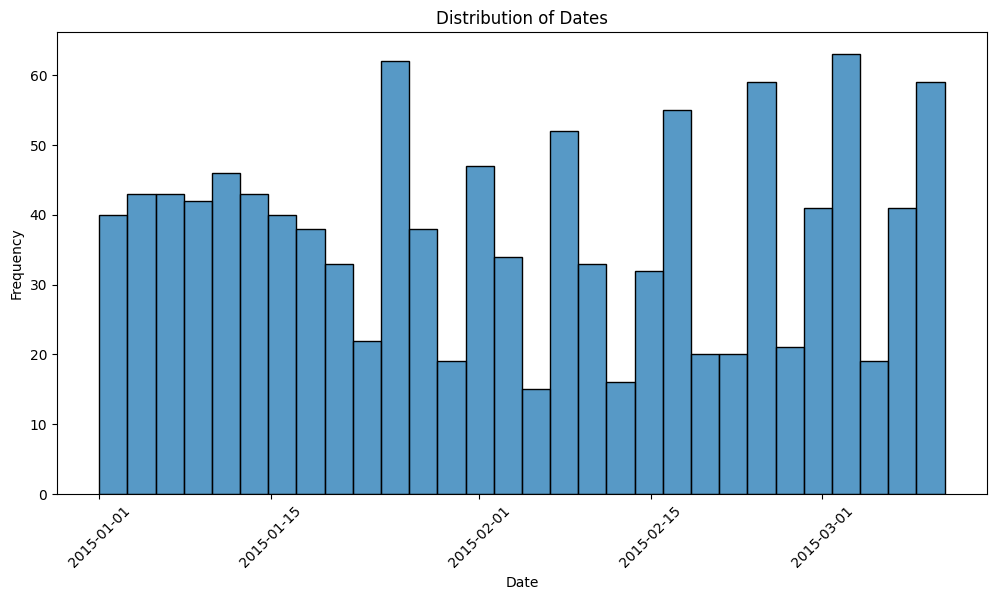

In [ ]:
# Plot the date range
plt.figure(figsize=(12, 6))
sns.histplot(df['date'], bins=30, kde=False)
plt.title('Distribution of Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Extract month and year for trend analysis
#df['month_year'] = df['date'].dt.to_period('M')

# Group by month and calculate mean productivity
#monthly_productivity = df.groupby('month_year')[['targeted_productivity', 'actual_productivity']].mean().reset_index()
#monthly_productivity

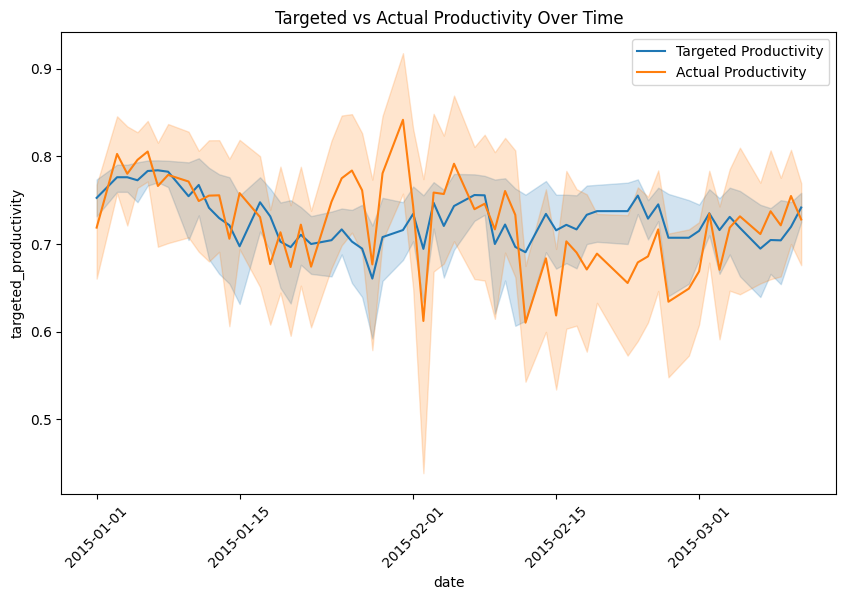

In [ ]:
# Convert 'date' column to datetime format
df_imputed['date'] = pd.to_datetime(df_imputed['date'])

# Plot Targeted vs Actual Productivity
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_imputed, x='date', y='targeted_productivity', label='Targeted Productivity')
sns.lineplot(data=df_imputed, x='date', y='actual_productivity', label='Actual Productivity')
plt.xticks(rotation=45)
plt.title('Targeted vs Actual Productivity Over Time')
plt.legend()
plt.show()

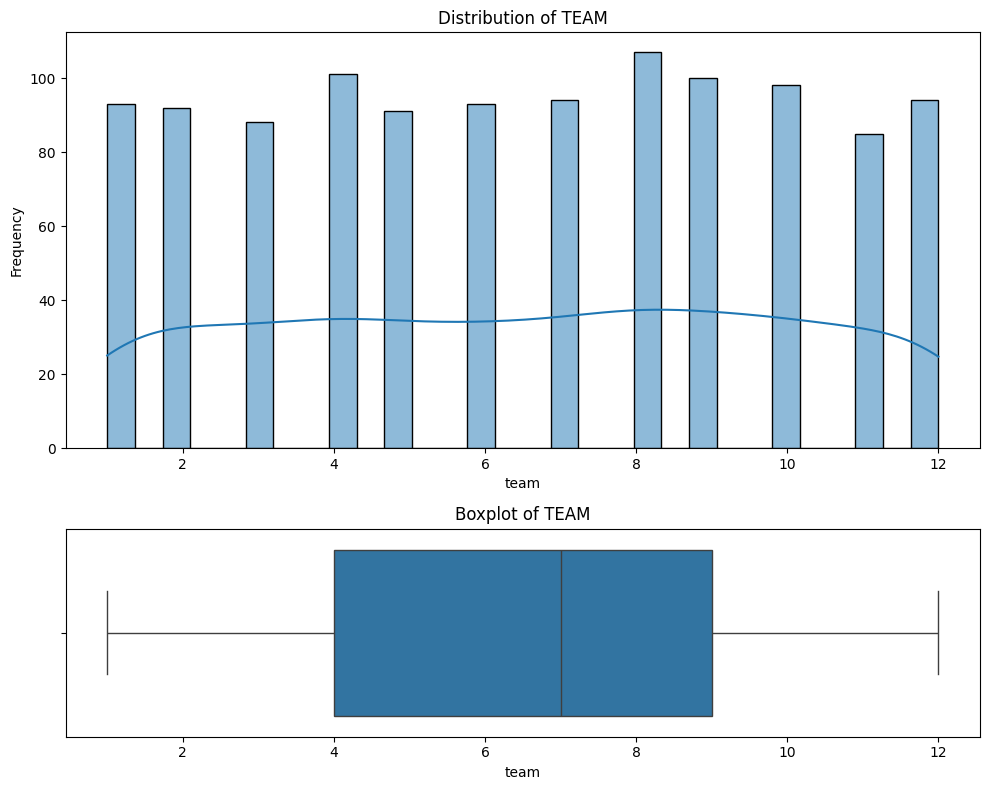

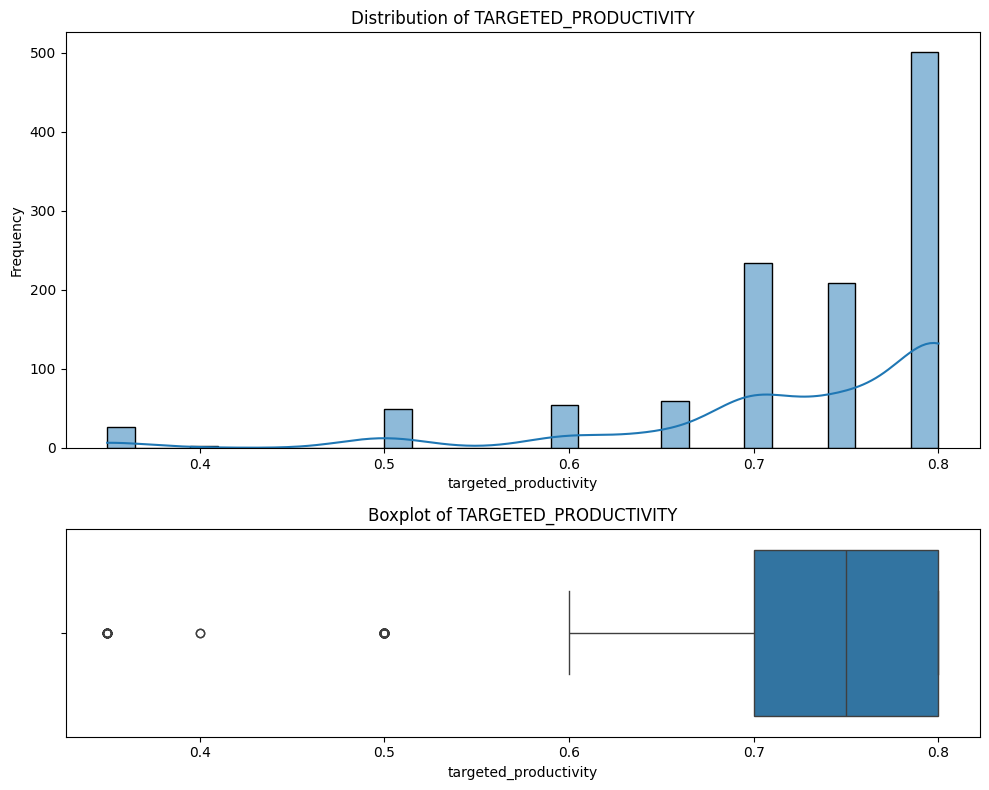

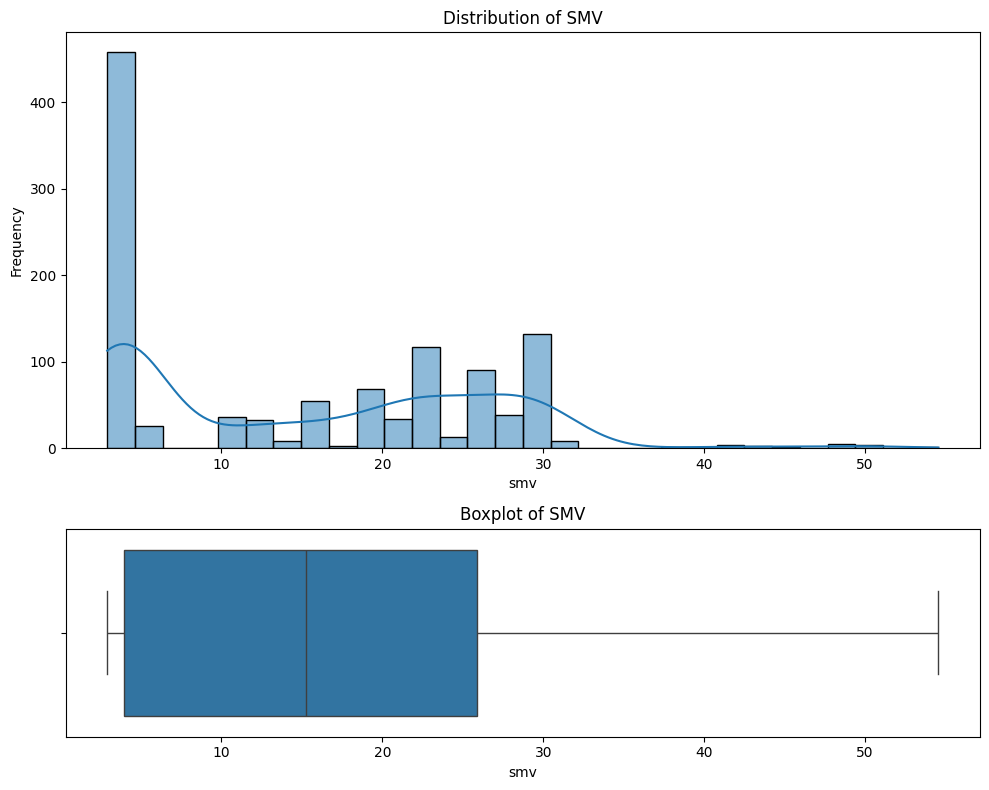

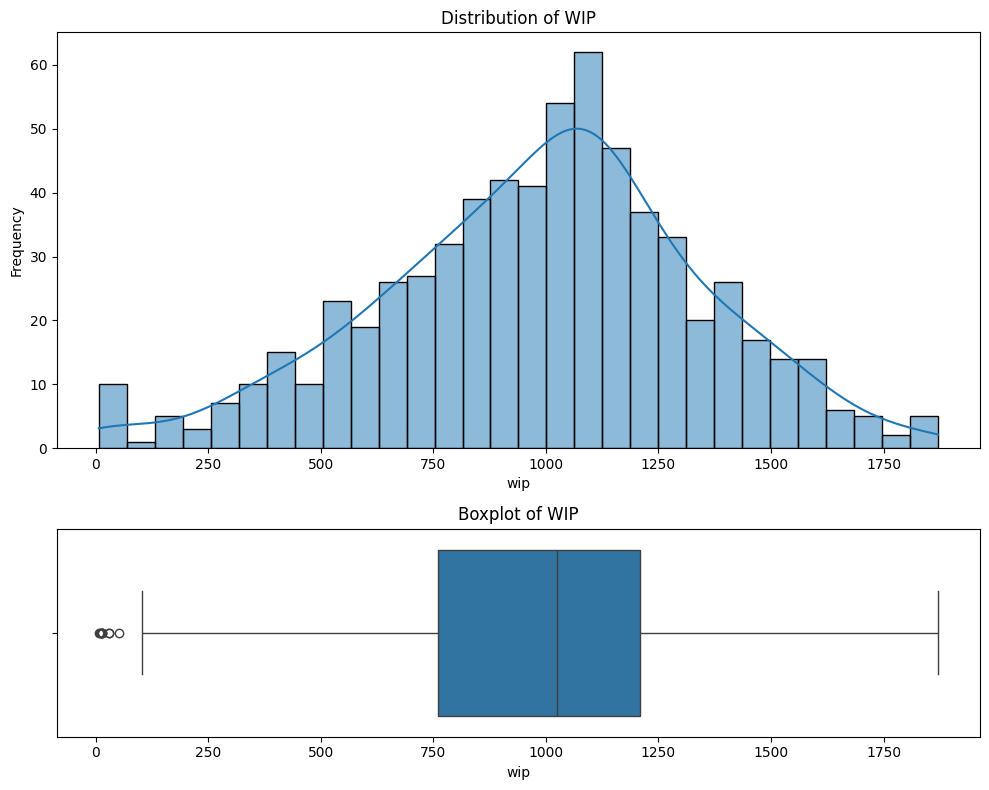

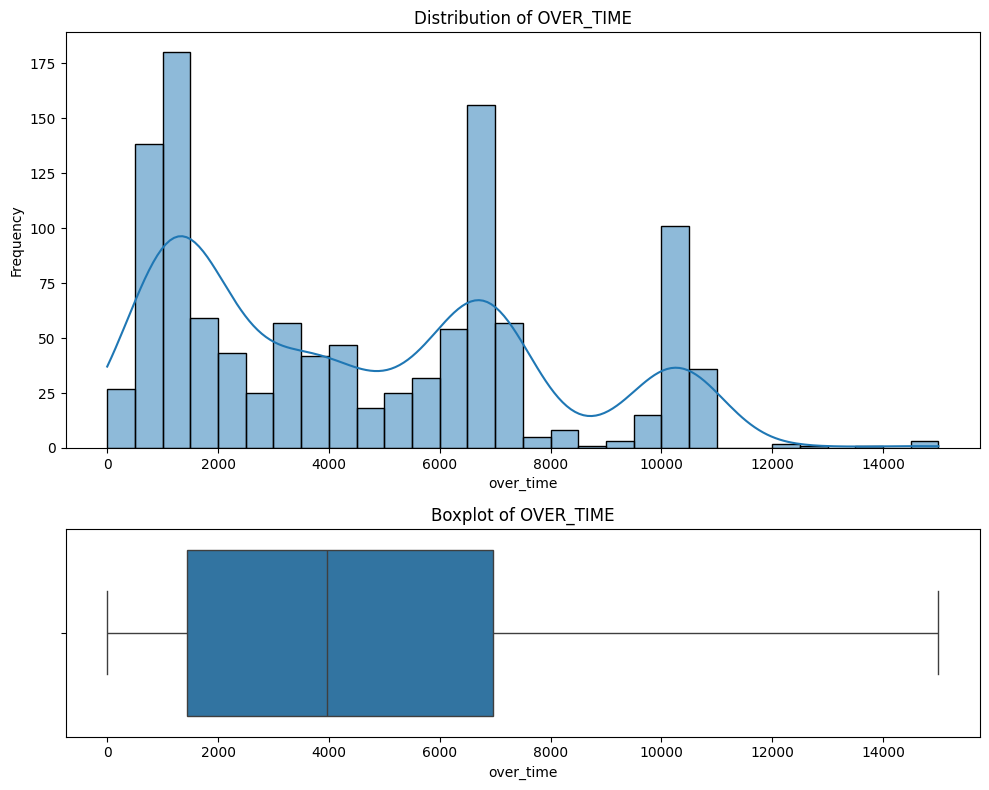

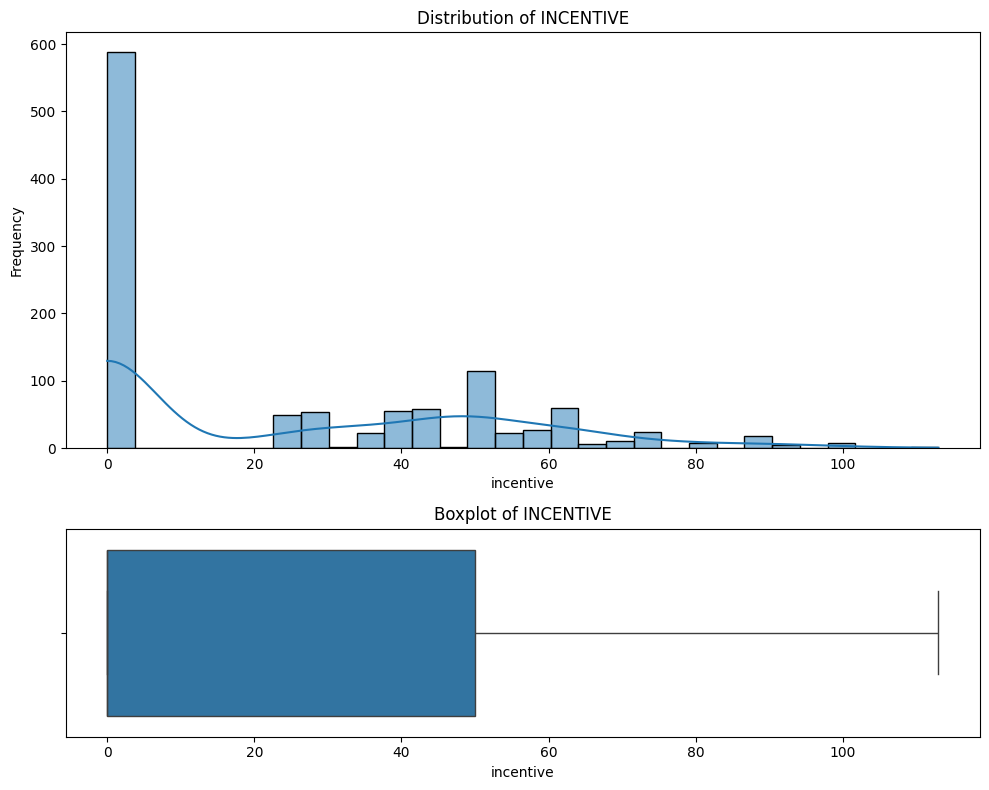

KeyError: 'idle_time'

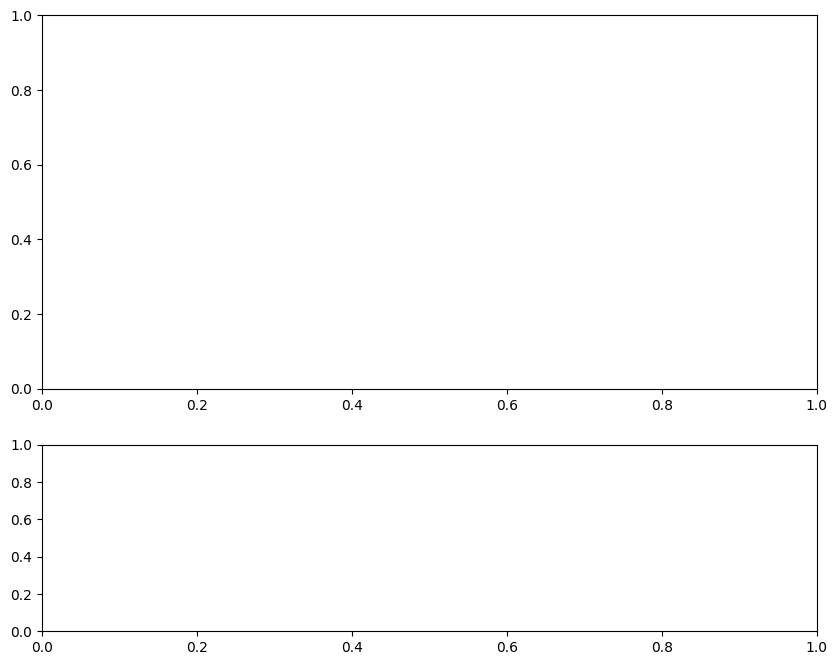

In [ ]:
for c in num_cols:
    check_outlier(c)

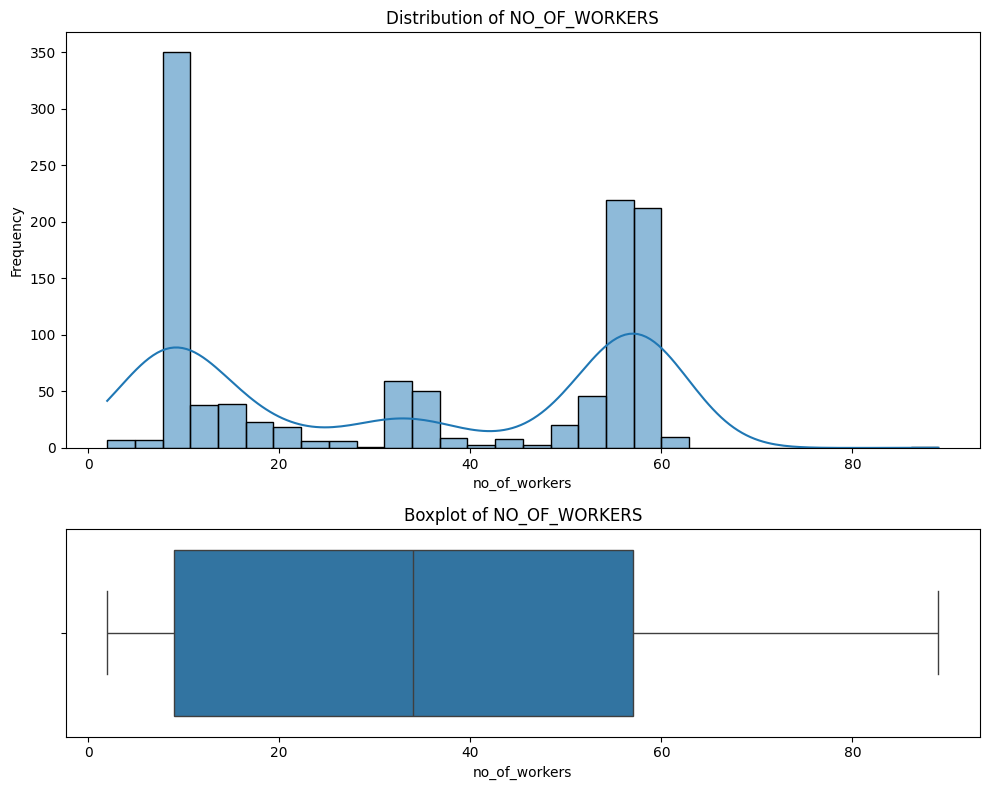

In [ ]:
check_outlier('no_of_workers')